In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
% matplotlib inline
from matplotlib import rc
rc('text', usetex=True)
from pylab import rcParams
rcParams['figure.figsize'] = 10,8

In [2]:
def linearFit(t, m, b): 
    return m*t + b

#defines linear fit function

In [4]:
data = np.genfromtxt('../data/data.csv', delimiter = ',', skip_header=True)
#imports data from text file

In [5]:
print(data)

[[ 106.854   32.57    61.48   368.     200.   ]
 [  96.854   29.52    55.38   340.     172.   ]
 [  86.854   26.47    49.29   316.     148.   ]
 [  76.854   23.43    43.19   300.     132.   ]
 [  66.      20.12    36.57   278.     110.   ]
 [  56.      17.07    30.48   260.      92.   ]
 [  46.      14.02    24.38   240.      72.   ]
 [  36.      10.97    18.29   218.      50.   ]
 [  26.       7.92    12.19   198.      30.   ]
 [  16.       4.88     6.09   180.      12.   ]
 [   6.       1.83     0.     168.       0.   ]]


In [6]:
xInFeet = data[ :, 0]
tInNs = data[ :, 1]
dx = [] #total change in distance travelled by the light in meters
dt = [] #change in time

In [7]:
i = 0
for i in range(len(xInFeet)):
    dx.append(2*0.3048*(xInFeet[i]-xInFeet[10]))
    i+=1
print (dx)
# calculates the total change in distance (twice the mirror's change) and converts it to meters

[61.480598400000005, 55.384598400000002, 49.288598400000005, 43.192598400000001, 36.576000000000001, 30.48, 24.384, 18.288, 12.192, 6.0960000000000001, 0.0]


In [8]:
j = 0
for j in range(len(tInNs)):
    dt.append(tInNs[j]-tInNs[10])
    j+=1
print (dt)
#calculates the change in time

[30.740000000000002, 27.689999999999998, 24.640000000000001, 21.600000000000001, 18.289999999999999, 15.24, 12.19, 9.1400000000000006, 6.0899999999999999, 3.0499999999999998, 0.0]


In [9]:
dx = np.array(dx)
dt = np.array(dt)
#transforms dx and dt from lists into arrays

Uncertainties: $\Delta x = \pm 0.04m$, $\Delta t = \pm 4 ns$

$c = \frac{dx}{dt}$

$\Delta c = \sqrt{(\frac{\partial c}{\partial x}\Delta x)^2 + (\frac{\partial c}{\partial t}\Delta t)^2}$

$\Delta c = \sqrt{(\frac{1}{t}0.04)^2 + (-xt^{-2}4\times10^{-9})^2}$

In [10]:
uncertaintyInC = []

In [11]:
k=0
for k in range(len(dx)-1):
    uncertaintyInC.append(np.sqrt(((0.05/dt[k])**2)+((dx[k]*dt[k])**(-2)*4*10**(-9))**2))
    k+=1
print(uncertaintyInC)

[0.0016265452179570592, 0.0018057060310581439, 0.0020292207792207795, 0.0023148148148148147, 0.0027337342810278844, 0.0032808398950131233, 0.0041017227235438892, 0.0054704595185995622, 0.0082101806239737278, 0.016393442622950821]


In [12]:
dc = np.average(uncertaintyInC)
print(dc) #this gives our average uncertainty of the speed of light)

0.00479666665082


In [13]:
fitParams, fitCovariances = curve_fit(linearFit, dt, dx)
print(fitParams)
print(fitCovariances)

[ 1.99996547  0.00256527]
[[  3.82386117e-08  -5.86342252e-07]
 [ -5.86342252e-07   1.26209562e-05]]


In [14]:
sigma = np.sqrt([fitCovariances[0,0], fitCovariances[1,1]])

/Users/samuelbphotos/anaconda/envs/py34/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


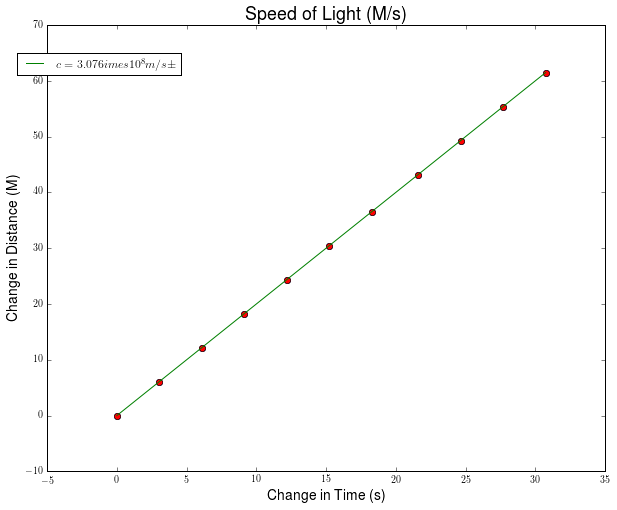

In [16]:
plt.plot (dt, dx, 'o')
plt.errorbar(dt, dx, fmt = 'ro', xerr=0.000000004, yerr = .05)
plt.xlabel('Change in Time (s)', fontsize = 14)
plt.ylabel('Change in Distance (M)', fontsize = 14)
plt.title('Speed of Light (M/s)', fontsize = 18)
plt.plot(dt, linearFit(dt, fitParams[0], fitParams[1]), label='$c=3.076 \times 10^8 m/s \pm  $')
plt.legend(bbox_to_anchor=(0.25,0.95))
plt.show()